In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model and Explainability
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # or Classifier
from sklearn.metrics import r2_score, mean_squared_error
import shap
import lime
import lime.lime_tabular

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ab4e86d8a9776564fd1ae543be24d878653d05d837318c9545dd30e9ea428408
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = "/content/drive/MyDrive/XAI_Project/"

In [5]:
import os

files = {
    "basic_edu": "Shareofworld.csv",
    "schooling": "learningadjustedyears.csv",
    "out_of_school": "outofschoolchildren.csv",
    "gender_gap": "gendergap.csv"
}
dfs = {name: pd.read_csv(os.path.join(base_path, fname)) for name, fname in files.items()}
for name, df in dfs.items():
    print(f"{name}: {df.shape}")
    display(df.head())

basic_edu: (468, 5)


,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
0,Albania,ALB,2015,2.0,98.0
1,Albania,ALB,2020,1.0,99.0
2,Algeria,DZA,2015,16.0,84.0
3,Algeria,DZA,2020,13.0,87.0
4,Argentina,ARG,2015,2.0,98.0


schooling: (637, 4)


,Entity,Code,Year,Learning-Adjusted Years of School
0,Afghanistan,AFG,2017,4.870000
1,Afghanistan,AFG,2018,4.949788
2,Afghanistan,AFG,2020,5.052838
3,Africa,NaN,2017,4.931378
4,Africa,NaN,2018,5.123904


out_of_school: (2580, 5)


,Entity,Code,Year,"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)","Out-of-school children, adolescents and youth of primary and secondary school age, female (number)"
0,Albania,ALB,2000,78614.0,81341.0
1,Albania,ALB,2001,77837.0,78849.0
2,Albania,ALB,2013,27879.0,21727.0
3,Albania,ALB,2014,21542.0,16571.0
4,Albania,ALB,2015,18407.0,13250.0


gender_gap: (9228, 9)


,Entity,Code,Year,"Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
0,Afghanistan,AFG,1986,0.62182,3.60227,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,1.40606,2.96306,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2003,0.51657,1.82170,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2004,0.51396,1.82145,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2009,1.41213,5.97378,NaN,NaN,NaN,NaN


In [6]:
print(os.listdir(base_path))

['Shareofworld.csv', 'outofschoolchildren.csv', 'gendergap.csv', 'learningadjustedyears.csv']


In [10]:
for name, df in dfs.items():
    # Rename the columns to a consistent format.
    rename_map = {"Entity": "Country", "Code": "Country_Code", "Year": "Year"}
    df.rename(columns=rename_map, inplace=True)
    # Drop nulls after renaming to ensure merge columns exist
    dfs[name] = df.dropna(subset=["Country", "Country_Code", "Year"]) # only drop nulls in merge columns

In [8]:
files = {
    "basic_edu": "Shareofworld.csv",
    "schooling": "learningadjustedyears.csv",
    "out_of_school": "outofschoolchildren.csv",
    "gender_gap": "gendergap.csv"
}
dfs = {name: pd.read_csv(os.path.join(base_path, fname)) for name, fname in files.items()}
for name, df in dfs.items():
    print(f"{name}: {df.shape}")
    display(df.head())

basic_edu: (468, 5)


,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
0,Albania,ALB,2015,2.0,98.0
1,Albania,ALB,2020,1.0,99.0
2,Algeria,DZA,2015,16.0,84.0
3,Algeria,DZA,2020,13.0,87.0
4,Argentina,ARG,2015,2.0,98.0


schooling: (637, 4)


,Entity,Code,Year,Learning-Adjusted Years of School
0,Afghanistan,AFG,2017,4.870000
1,Afghanistan,AFG,2018,4.949788
2,Afghanistan,AFG,2020,5.052838
3,Africa,NaN,2017,4.931378
4,Africa,NaN,2018,5.123904


out_of_school: (2580, 5)


,Entity,Code,Year,"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)","Out-of-school children, adolescents and youth of primary and secondary school age, female (number)"
0,Albania,ALB,2000,78614.0,81341.0
1,Albania,ALB,2001,77837.0,78849.0
2,Albania,ALB,2013,27879.0,21727.0
3,Albania,ALB,2014,21542.0,16571.0
4,Albania,ALB,2015,18407.0,13250.0


gender_gap: (9228, 9)


,Entity,Code,Year,"Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
0,Afghanistan,AFG,1986,0.62182,3.60227,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,1.40606,2.96306,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2003,0.51657,1.82170,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2004,0.51396,1.82145,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2009,1.41213,5.97378,NaN,NaN,NaN,NaN


In [12]:
from functools import reduce

df_merged = reduce(lambda left, right: pd.merge(left, right, on=["Country", "Country_Code", "Year"], how="left"), dfs.values())

print(df_merged.shape)
display(df_merged.head())

(350, 14)


,Country,Country_Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020",Learning-Adjusted Years of School,"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)","Out-of-school children, adolescents and youth of primary and secondary school age, female (number)","Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
0,Albania,ALB,2015,2.0,98.0,NaN,18407.0,13250.0,73.53012,51.56088,86.97802,87.83338,NaN,NaN
1,Albania,ALB,2020,1.0,99.0,8.953018,NaN,NaN,71.36869,45.05058,NaN,NaN,NaN,NaN
2,Algeria,DZA,2015,16.0,84.0,NaN,NaN,NaN,45.04758,28.78973,NaN,NaN,NaN,NaN
3,Algeria,DZA,2020,13.0,87.0,7.091553,NaN,NaN,66.42428,39.15606,NaN,NaN,NaN,NaN
4,Argentina,ARG,2015,2.0,98.0,NaN,172686.0,68331.0,104.51591,64.05334,86.07140,90.89313,NaN,NaN


In [13]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns

# Handle potential missing values before scaling
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(df_merged[numeric_cols].mean()) # Using mean imputation as an example

scaler = StandardScaler()
df_merged[numeric_cols] = scaler.fit_transform(df_merged[numeric_cols])

In [14]:
target = "Learning-Adjusted Years of School"
features = [col for col in df_merged.columns if col not in ["Country", "Country_Code", "Year", target]]

X = df_merged[features]
y = df_merged[target]

In [15]:
print(df_merged.columns)

Index(['Country', 'Country_Code', 'Year',
       'Share of population with no formal education, 1820-2020',
       'Share of population with some formal education, 1820-2020',
       'Learning-Adjusted Years of School',
       'Out-of-school children, adolescents and youth of primary and secondary school age, male (number)',
       'Out-of-school children, adolescents and youth of primary and secondary school age, female (number)',
       'Combined gross enrolment ratio for tertiary education, female',
       'Combined gross enrolment ratio for tertiary education, male',
       'Combined total net enrolment rate, secondary, male',
       'Combined total net enrolment rate, secondary, female',
       'Combined total net enrolment rate, primary, female',
       'Combined total net enrolment rate, primary, male'],
      dtype='object')


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.5215101283095768
MAE: 0.486707628435971


/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


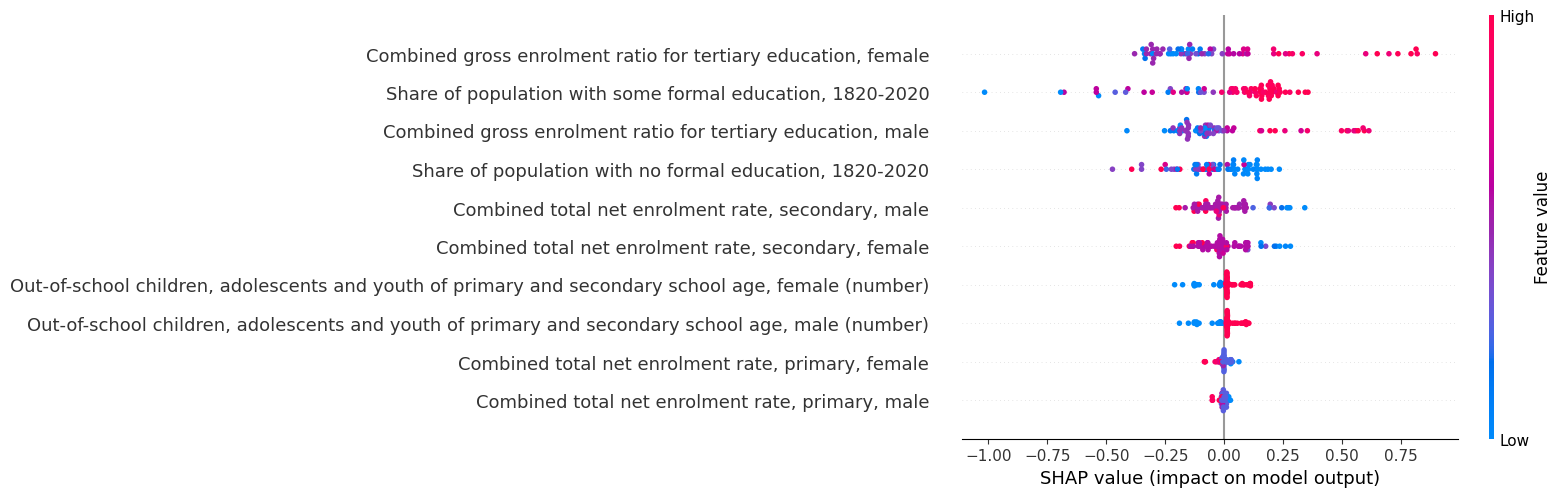

/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


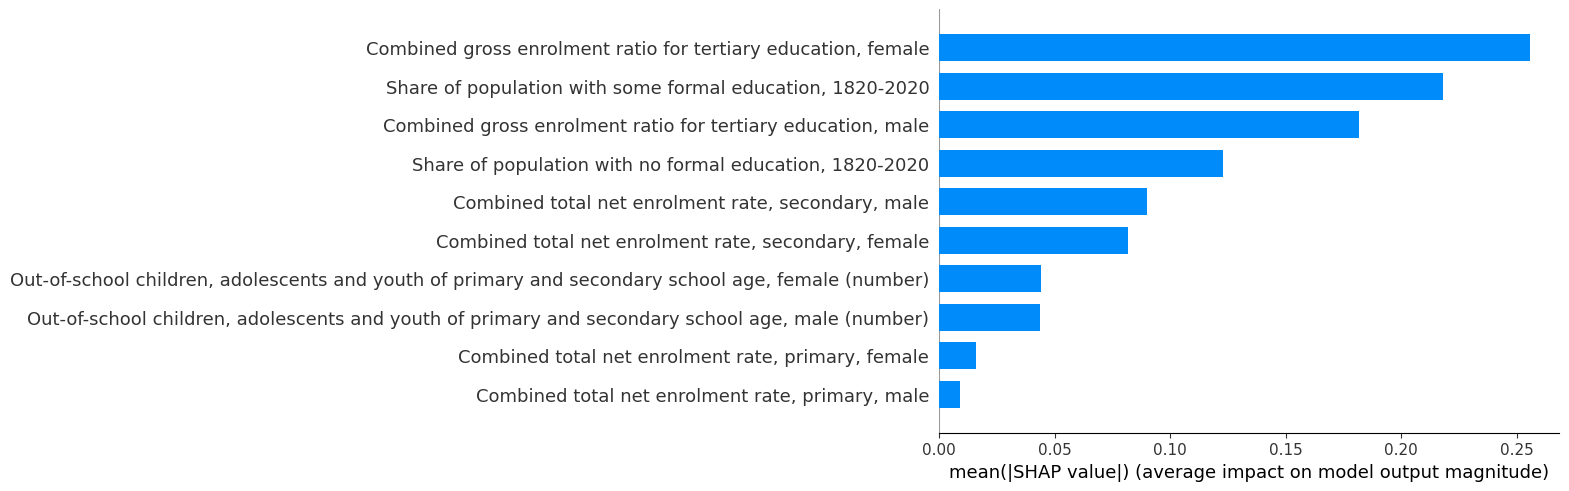

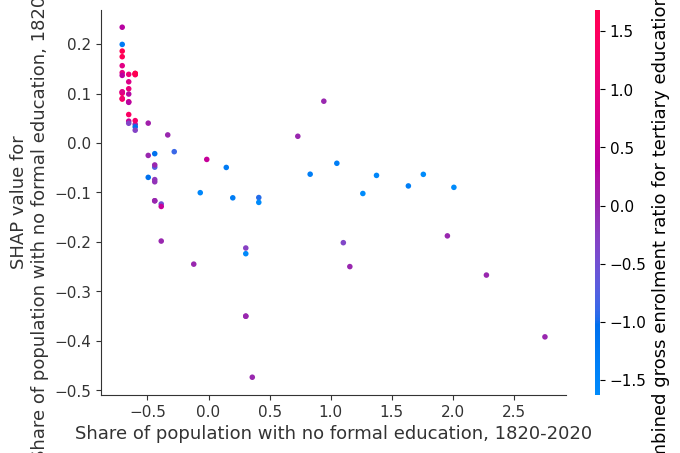

In [17]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)

# Bar plot (feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Dependence plot (interaction)
shap.dependence_plot('Share of population with no formal education, 1820-2020', shap_values, X_test)

# Force plot for one observation (local)
sample = X_test.iloc[0,:]
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [18]:
# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'  # change to 'classification' for classifier models
)

# Choose a sample
i = 0
exp = lime_explainer.explain_instance(X_test.iloc[i].values, model.predict)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


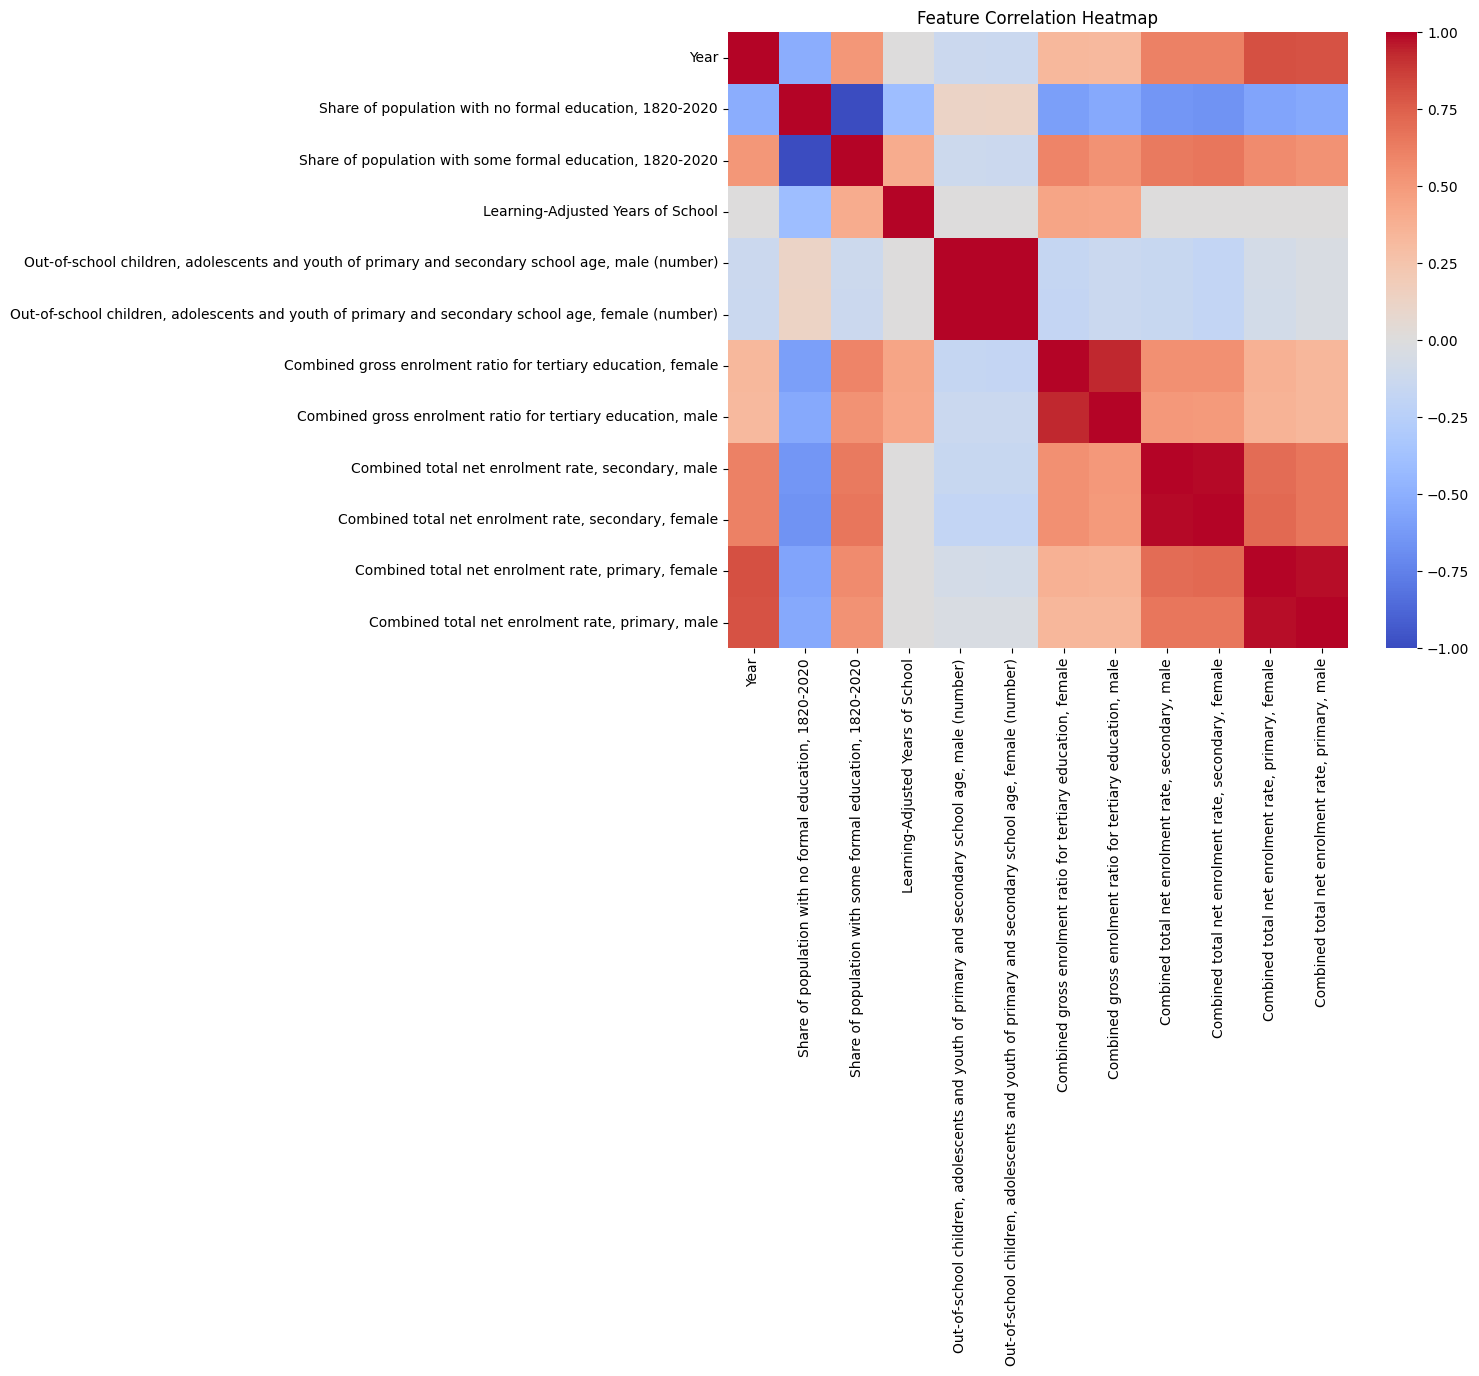

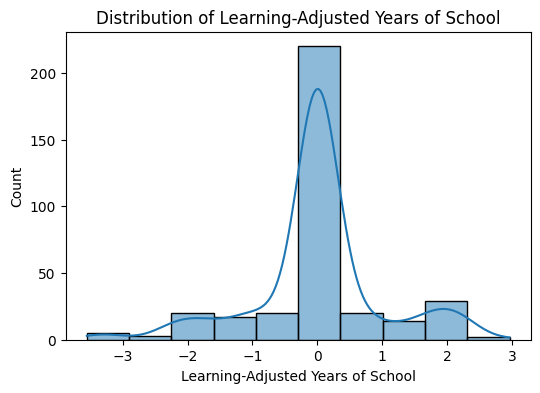

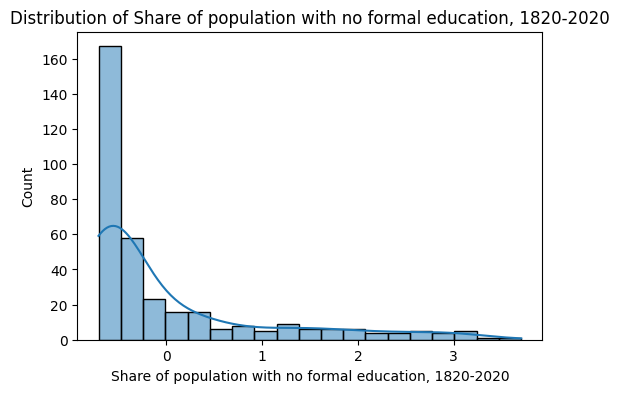

In [19]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_merged.corr(numeric_only=True), annot=False, cmap='coolwarm') # Set annot to False for better readability with many features
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution plot for key variables (replace with relevant columns from df_merged)
# Using a few example numeric columns from df_merged
for col in ['Learning-Adjusted Years of School', 'Share of population with no formal education, 1820-2020']:
    plt.figure(figsize=(6,4))
    sns.histplot(df_merged[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1737039923.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


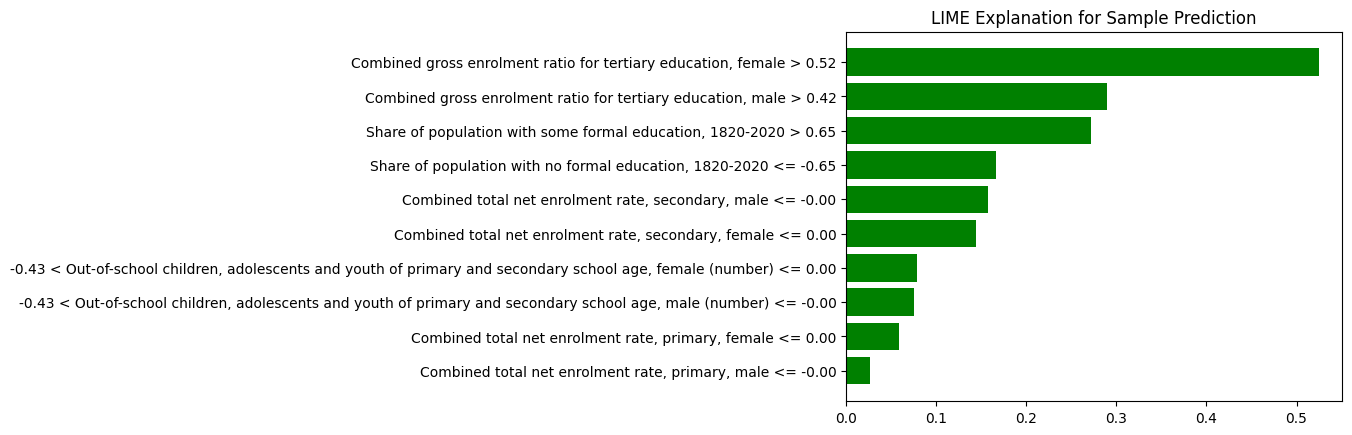

In [20]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'  # 'classification' if using a classifier
)

# Choose a sample (e.g., the first test instance)
i = 0
exp = lime_explainer.explain_instance(
    X_test.iloc[i].values,
    model.predict,
    num_features=10  # you can increase/decrease this
)

# Save the explanation as an image
fig = exp.as_pyplot_figure()
plt.title("LIME Explanation for Sample Prediction", fontsize=12)
plt.tight_layout()
plt.savefig("lime_explanation.png", dpi=300, bbox_inches="tight")
plt.show()

In [21]:
# from google.colab import files
# files.download("lime_explanation.png")
